In [1]:
import numpy as np

import numpy.fft as npf

import matplotlib

import matplotlib.pyplot as plt

import time

import imagetools.provided as im

# Q1

In [2]:
def average_power_spectral_density(x):
    '''
        x is a list of K images (color or grayscale)
    '''
    
    x_hat = [np.abs(npf.fft2(element,axes=(0,1)))**2 for element in x]
    
    # sum over the third dimension if rgb image
    x_hat = [np.sum(element,axis=2) for element in x_hat if element.ndim==3]
    
    # take the average as described in Q1
    average_S = sum(x_hat) / len(x)

    return average_S

# Q2

In [3]:
eagle, plane, sheeps = plt.imread('assets/eagle.png'),plt.imread('assets/plane.png'),plt.imread('assets/sheeps.png')

In [4]:
apsd = average_power_spectral_density([eagle, plane, sheeps])

C:\Users\kelsi\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


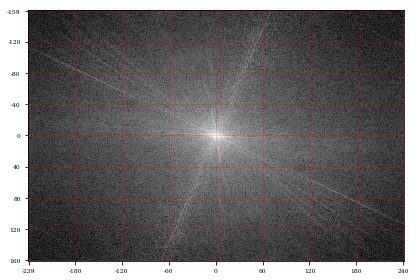

In [5]:
im.showfft(apsd, apply_log=True, vmin=-10, vmax=5)

# Q3

$S_{u,v} = n_{1}n_{2}e^{\beta}\omega^{\alpha}$

$\log{S_{u,v}} = \log{n_{1}} + \log{n_{2}} + \log{e^{\beta}} + \log{\omega^{\alpha}}$

$\log{S_{u,v}} = \log{n_{1}} + \log{n_{2}} + \beta + \alpha \log{\omega}$

$\log{S_{u,v}} - \log{n_{1}} - \log{n_{2}}  =  \alpha \log{\omega} + \beta$

$\text{Let } s_{u,v} = \text{LHS}, t_{u,v} = \log{\omega_{u,v}}$

$\text{then, we have } s_{u,v}  =  \alpha t_{u,v} + \beta$


# Q4

$$\text{Setting } \frac{\partial SSE(\alpha,\beta)}{\partial \alpha} = 0$$

$$
0 = \sum_{u,v} t_{u,v} (\alpha t_{u,v} + \beta - s_{u,v}) \text{     (1) }
$$

$$
0 = \alpha \sum_{u,v} t_{u,v}^2 + \beta \sum_{u,v} t_{u,v} - \sum_{u,v} s_{u,v} t_{u,v} \text{     (1.1) }
$$

$$
\sum_{u,v} s_{u,v} t_{u,v} = \alpha \sum_{u,v} t_{u,v}^2 + \beta \sum_{u,v} t_{u,v} \text{     (1.2) }
$$


$$\text{Setting } \frac{\partial SSE(\alpha,\beta)}{\partial \beta} = 0$$

$$
0 = \sum_{u,v} (\alpha t_{u,v} + \beta - s_{u,v}) \text{     (2) }
$$

$$\text{distributing the sum for equation 2 gives }$$


$$
0 = \alpha \sum_{u,v} t_{u,v} + n_{1} n_{2} \beta - \sum_{u,v} s_{u,v} \text{     (2.1) }
$$

$$
\sum_{u,v} s_{u,v} = \alpha \sum_{u,v} t_{u,v} + n_{1} n_{2} \beta \text{     (2.2) }
$$

We have,

$$\begin{pmatrix} \sum_{u,v} t_{u,v}^2 & \sum_{u,v} t_{u,v}\\\ \sum_{u,v} t_{u,v} & n_{1} n_{2}\end{pmatrix} \begin{pmatrix} \alpha \\ \beta \end{pmatrix} = \begin{pmatrix} \sum_{u,v} s_{u,v} t_{u,v} \\ \sum_{u,v} s_{u,v} \end{pmatrix}$$

$$ \text{Invertible since clearly the determinant is not 0 (since } \omega_{u,v} \text{ is not 0)} $$

$$
\text{det = } n_{1} n_{2} \sum_{u,v} t_{u,v}^2 - (\sum_{u,v} t_{u,v})^2
$$

$$\begin{pmatrix} \alpha \\ \beta \end{pmatrix} = \frac{1}{\text{det}} \begin{pmatrix} n_{1} n_{2} \sum_{u,v} s_{u,v} t_{u,v} + (-\sum_{u,v} t_{u,v}) \sum_{u,v} s_{u,v} \\ (-\sum_{u,v} t_{u,v}) \sum_{u,v} s_{u,v} t_{u,v} + \sum_{u,v} t_{u,v}^2 \sum_{u,v} s_{u,v}\end{pmatrix}$$

# Q5

In [24]:
def mean_power_spectrum_density(apsd):
    n1,n2 = apsd.shape
    u,v = np.mgrid[0:n1, 0:n2]
    
    @np.vectorize
    def t(u,v):
        omega = np.sqrt((u/n1)**2 + (v/n2)**2)
        if omega == 0:
            return np.nan
        
        return np.log(omega)
    
    @np.vectorize
    def s(u,v):
        temp = apsd[u,v] / (n1*n2)
        if temp == 0:
            return np.nan
        
        return np.log(temp)   

    det = n1*n2*np.sum(np.nan_to_num(np.square(t(u,v)))) - np.square(np.sum(np.nan_to_num(t(u,v))))
    
    alpha = n1*n2*np.sum(np.nan_to_num(s(u,v)*t(u,v))) - \
            np.sum(np.nan_to_num(t(u,v))) * np.sum(np.nan_to_num(s(u,v)))
    beta = -np.sum(np.nan_to_num(t(u,v))) * np.sum(np.nan_to_num(s(u,v)*t(u,v))) + \
            np.sum(np.square(np.nan_to_num(t(u,v))))*np.sum(np.nan_to_num(s(u,v)))
    
    alpha /= det
    beta /= det
                           
    print(alpha)
    print(beta)
    @np.vectorize
    def omega(u,v):
        omega = np.sqrt((u/n1)**2 + (v/n2)**2)
        if omega==0:
            return np.nan
        
        return omega
    
    #calculate omegas array (for multiplying to the end result, mpsd) according to eqn 2 (pg.1) of assignment6
    mpsd = n1*n2* np.exp(beta) * np.power(omega(u,v),alpha)
    mpsd[0,0] = np.inf
    return mpsd, alpha, beta

# Q6
## 

In [25]:
mpsd, alpha, beta = mean_power_spectrum_density(apsd)

-0.4336234709134305
-5.729486133212995


In [26]:
mpsd

array([[          inf, 7301.41366835, 5405.96566369, ...,  502.97237171,
         502.51677733,  502.06254448],
       [6126.96372386, 5656.65961881, 4908.1883082 , ...,  502.97130007,
         502.51571113,  502.06148368],
       [4536.40308828, 4433.7509286 , 4188.18999436, ...,  502.96808523,
         502.5125126 ,  502.05830134],
       ...,
       [ 503.65618961,  503.65570868,  503.65426591, ...,  433.08371623,
         432.8867078 ,  432.68979114],
       [ 502.97095029,  502.97047303,  502.96904123, ...,  432.78946486,
         432.5932057 ,  432.39703639],
       [ 502.28878362,  502.28830997,  502.28688905, ...,  432.49541341,
         432.29990067,  432.10447589]])

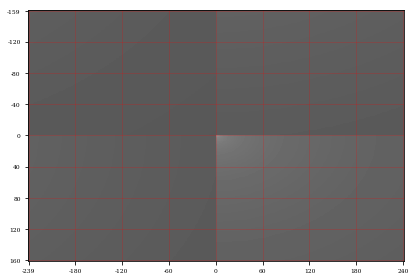

In [40]:
plt.figure()
im.showfft(mpsd, apply_log=True, vmin=-10, vmax=2)

In [ ]:
mpsd